In [ ]:
import tensorflow as tf
import numpy as np
from datetime import datetime
from keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

In [ ]:
def preprocessDataset(dataset):
    """
    Preprocesses an entire set of datapoints so that they are usable by a neural network

    :param dataset: The dataset that is to be preprocessed in the form (images, labels)
    :return: The preprocessed dataset in the form (processedImages, processedLabels)
    """

    # Unpacks the dataset into the images (input data) and labels (expected output data)
    images, labels = dataset

    # Preprocesses the input data
    newImages = images.reshape(images.shape[0], images.shape[1], images.shape[2], 3)
    # Condenses the values of the images so that they fall within 0 and 1
    newImages = newImages / 255.0

    # Preprocesses the expected output data

    # Collapses the n-dimensional array into a 1D array
    # For example:
    # [ [ 1, 2 ], [ 3, 4 ] ]
    # [ 1, 2, 3, 4 ]
    newLabels = labels.flatten()

    # Converts the labels from a 1D array of numbers ranging from 1 - 10 to a 2D array of 0s
    # in which each number in the 1D array has a respective array within the 2D array, and
    # the value of said number is the index in the other array that is a 1
    #
    # For example:
    # 1D array: [ 1, 2, 2, 4, 3 ]
    # One Hotted 2D Array:
    # [ [ 1, 0, 0, 0 ],   // 1
    #   [ 0, 1, 0, 0 ],   // 2
    #   [ 0, 1, 0, 0 ],   // 2
    #   [ 0, 0, 0, 1 ],   // 4
    #   [ 0, 0, 1, 0 ] ]  // 3
    newLabels = tf.one_hot(newLabels.astype(np.int32), depth=10)

    return newImages, newLabels


def getRawDatasets():
    """
    :return: The unprocessed datasets that the neural network is to be trained on and tested against
    """

    # Using the CIFAR-10 dataset
    return tf.keras.datasets.cifar10.load_data()

In [ ]:
def getTrainingConfigurations():
    """
    Epochs: The amount of times the neural network trains against the entire training dataset
    Batch Size: The amount of samples ran through before the gradient update is applied
    Callbacks: The set of callbacks that will be applied during the training (e.g. saving)
    Optimizer: The method that will be used in training the neural network
    Loss Function: The loss function the neural network will use to judge its performance
    Metrics: The metrics that will allow the user to understand the performance of the neural network

    :param saveDir: The directory where the neural network is saved, indicated only if loading a neural network
    :return: A tuple of the configurations described above, in order
    """

    epochs = 300
    batchSize = 32

    # Gets the datetime now as to create unique folders
    timeNow = datetime.now().strftime("%Y%m%d-%H%M%S")
    # The folder the fitness logs will be saved to
    logDir = "logs/fit/" + timeNow
    # The directory the neural network will be saved to
    saveDir = "save_files/" + timeNow

    ## TODO: TensorBoard callback can be removed
    callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logDir, histogram_freq=1),
                 tf.keras.callbacks.ModelCheckpoint(filepath=saveDir, verbose=1)]

    # Using Stochastic Gradient Descent, which estimates the gradient of the entire dataset
    # instead of calculating the gradient at the current data point
    optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

    # Calculates the loss based on the difference in value of the expected and actual outputs, with
    # respect to the other outputs
    loss = "categorical_crossentropy"

    # Accuracy is being used as a user-friendly way of displaying the effectiveness of the neural network
    metrics = ["accuracy"]

    return epochs, batchSize, callbacks, optimizer, loss, metrics

In [ ]:
def createModel(train_images):
  """
  Creates and returns the model of our CNN
  Num_classes: The number of classes (categories) in the CIFAR-10 dataset
  Model: The model of our CNN to be returned

  #TODO: Make this more elegant??
  :param: Set of training images, used to determine the input shape
  :return: An object of type tf.keras.Model
  """
  # 10 categories in the CIFAR-10 dataset
  num_classes = 10

  model = models.Sequential()
  model.add(layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, 3, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, 3, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.45)) # was 0.35

  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, 3, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.5)) # was 0.45

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L2(0.001))) # added new regularizer
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(num_classes, activation='softmax'))

  model.summary()

  return model

In [ ]:
def getOptimizer():
  """
  Opt: The optimizer to be returned, here it is a Stochastic Gradient Descent function with a learning rate of 0.001 and a momentum of 0.9

  :return: Our optimization function
  """
  opt = SGD(lr=0.001, momentum=0.9)
  return opt

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)       

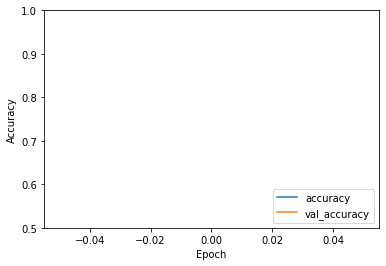

In [ ]:
# Main function
if __name__ == "__main__":
    # Training configurations
    epochs, batchSize, callbacks, optimizer, loss, metrics = getTrainingConfigurations()

    # Raw datasets
    rawTrainingDataset, rawTestingDataset = getRawDatasets()

    # Preprocessed datasets
    trainingImages, trainingLabels = preprocessDataset(rawTrainingDataset)
    testingImages, testingLabels = preprocessDataset(rawTestingDataset)

    # Model
    model = createModel(trainingImages)

    # Optimizer
    opt = getOptimizer()

    # Compile model, uses cross entropy as a loss function
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Begin training the model
    history = model.fit(trainingImages, trainingLabels, epochs=epochs, validation_data=(testingImages, testingLabels), batch_size=batchSize, callbacks=callbacks)

    # Create plot
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(testingImages, testingLabels, verbose=2)